In [1]:
from __future__ import division, print_function

import requests

import pandas as pd
import numpy as np

from IPython.core.display import HTML, Image

In [2]:
PATH = '/Users/ac/Desktop/'

# Webscraping

In data science work, it is often necessary to retrieve data from websites. Occassionally, sites will provide an API that allows their data to be easily accessed, but often this isn't the case. When an API is not available, the only real option is to build a webscraper. A webscraper retrieves the webpage in the same way your browser retrieves the page, but because we're doing it with code, we are able to parse the resulting site's webpage. 

To understand how to retrieve and parse a webpage, we need to know about two things:
HTTP and the DOM.

## HTTP

Hypertext Transfer Protocol, or HTTP, is a text-based standard that allows clients and servers to communicate over TCP/IP. YOu can think of HTTP as the language computers communicate with and TCP/IP as the channel over which it is done. HTTP is based on a client-server model. A client makes a request for some resource, and the server responds with the status of that request and the resource if available.

## HTTP Requests

There are two common types of HTTP requests: GET and POST

### GET

GET requests are by far the most common, they simply ask the server to retrieve some resource, typically a webpage, and to return it.

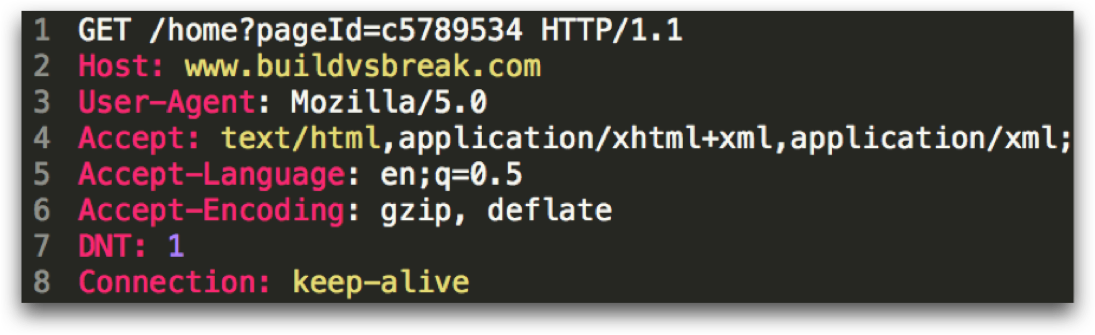

In [3]:
Image(PATH + 'get_header.png')

### POST

A POST request is nearly identical to a GET request, but includes a payload of some sort in the request body. 

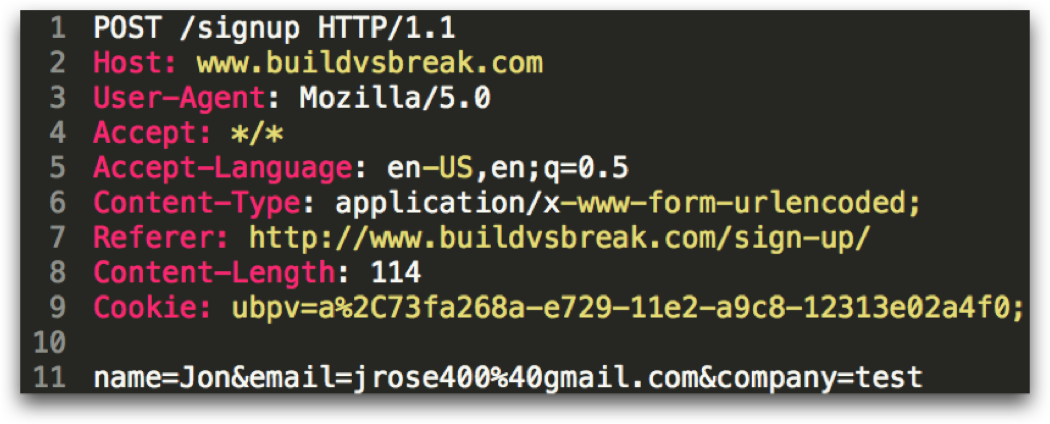

In [4]:
Image(PATH + 'post_header.png')

## Typical Use Cases

GET requests are the standard way to request a webpage (as your browser would do). Some simple forms will use get as well. More sophisticaed forms will utilize a POST request. GET requests pass parameters in the URL, while POST requests do not. This tends to make POST request more secure. 

N.B. Do not rely on POST alone as a security measure!

## HTTP Response

Once a request is made, the server will respond, and the first thing they will respond with is a response code.

### Response codes

- 1XX - Informational
- 2XX - Success
- 3XX - Redirection
- 4XX - Client Error
- 5XX - Server Error

### Greatest Hits

- **200 - OK** - The requested action was successfully executed
- **301 - Moved Permanently** - The resource has been relocated (and will not be back, so please stop asking me)
- **400 - Bad Request** - The the client request is malformed in some way
- **403 - Forbidden** - The requesting client (i.e. you) does not have permission to view the resource
- **404 - Not Found** - The resource can't be found at the moment (may be in the future, so check back later)
- **405 - Method Not Allowed** - Used GET when only POST was applicable for example
- **418 - I'm a teapot** - For when the server is a teapot
- **420 - NOT an HTTP code** - you're thinking of something else
- **429 - Too Many Requests** - They're on to you and if you keep it up, they'll block you permenantly
- **500 - Internal Server Error** -Some non-specific bad happened on their end
- **502 - Bad Gateway** - The server was waiting on another resource and it ended badly
- **503 - Service Unavailable** - The server is overloaded or down at the moment

## DEMO: Using Python Requests library to retrieve web pages

In [5]:
import requests

## First, we make a request to retrieve a website

In [6]:
r = requests.get('http://news.ycombinator.com')

### We can check the response code

In [7]:
r

<Response [200]>

### Let's see the headers we sent

In [8]:
r.request.headers

{'Connection': 'keep-alive', 'Cookie': '__cfduid=dfd8a710b7f939a5731f4eadfa551199b1467040649', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'User-Agent': 'python-requests/2.9.1'}

In [9]:
for k, v in r.request.headers.items():
    print(k + ':', v)

Connection: keep-alive
Cookie: __cfduid=dfd8a710b7f939a5731f4eadfa551199b1467040649
Accept-Encoding: gzip, deflate
Accept: */*
User-Agent: python-requests/2.9.1


## We can also see the response headers

In [10]:
r.headers

{'Content-Encoding': 'gzip', 'Transfer-Encoding': 'chunked', 'Strict-Transport-Security': 'max-age=31556900; includeSubDomains', 'Vary': 'Accept-Encoding', 'Server': 'cloudflare-nginx', 'Connection': 'keep-alive', 'Cache-Control': 'private, max-age=0', 'Date': 'Mon, 27 Jun 2016 15:17:29 GMT', 'X-Frame-Options': 'DENY', 'Content-Type': 'text/html; charset=utf-8', 'CF-RAY': '2b99ddbab779219e-EWR'}

In [11]:
for k, v in r.headers.items():
    print(k + ':', v)

Content-Encoding: gzip
Transfer-Encoding: chunked
Strict-Transport-Security: max-age=31556900; includeSubDomains
Vary: Accept-Encoding
Server: cloudflare-nginx
Connection: keep-alive
Cache-Control: private, max-age=0
Date: Mon, 27 Jun 2016 15:17:29 GMT
X-Frame-Options: DENY
Content-Type: text/html; charset=utf-8
CF-RAY: 2b99ddbab779219e-EWR


## Let's see what content came back

In [12]:
r.content

'<html op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?vPYhKXHRXSuc4TqypFgD">\n        <link rel="shortcut icon" href="favicon.ico">\n          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">\n        <script type="text/javascript">\nfunction hide(id) {\n  var el = document.getElementById(id);\n  if (el) { el.style.visibility = \'hidden\'; }\n}\nfunction vote(node) {\n  var v = node.id.split(/_/);\n  var item = v[1];\n  hide(\'up_\'   + item);\n  hide(\'down_\' + item);\n  var ping = new Image();\n  ping.src = node.href;\n  return false;\n  }\n    </script><title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">\n        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18

In [13]:
HTML(r.content.decode('utf-8'))

## E1. 
Using the requests library, retrieve a wepage of your choosing with a GET request. Examine the response code, the headers, and the content. Use IPython.core.display HTML() to display the page in your IPython notebook. Compare the results with the actual page you requested.

## Webscraping - The Struggle is real

- Robots.txt
- User Agent
- Ajax

## Ajax - The enemy of the webscraper

In [14]:
r2 = requests.get('http://www.google.com')

In [15]:
r2

<Response [200]>

In [16]:
HTML(r2.content.decode('latin-1'))

,,Advanced searchLanguage tools


## How do you handle Ajax?

If a site uses ajax on content you need to scrape, you will have to use a browser object to retrieve it. The difference between a library like requests and an actual browser object is that requests just sends and receives text. The browser object "renders" the webpage just like Firefox or Chrome does. Fortunately, there are things called "headless browsers" that have no UI component. This makes them lightweight and able to be manipulated easily with code. 

## DEMO: Using Selenium with PhantomJS

## Selenium with PhantomJS

You'll need to pip install Selenium and Download and extract PhantomJS

In [19]:
from selenium import webdriver

driver = webdriver.PhantomJS(executable_path='/Users/ac/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(1024, 768) 
driver.get('https://www.google.com/#q=data+science')

In [24]:
HTML(driver.page_source)

## E2. 
1. Pip install selenium 
2. Download and unzip phantomJS 2.1.1 from https://bitbucket.org/ariya/phantomjs/downloads
3. Use the library to pull down an ajax-based page such as Google search results

# Now How Do We Get the Content Out of the Page?

## DOM

> The Document Object Model (DOM) is a programming interface for HTML and XML documents. It provides a structured representation of the document and it defines a way that the structure can be accessed from programs so that they can change the document structure, style and content. The DOM provides a representation of the document as a structured group of nodes and objects that have properties and methods. Essentially, it connects web pages to scripts or programming languages.

## Typical Web Page Structure

    <html>
        <head>
        </head>
        <body>
            <div id="header" class="extraFancy">I'm a header!</div>
            <div id="main">
                I'm a div!
                <ul>
                    I'm an unordered list!
                    <li>I'm list item 1</li>
                    <li>I'm list item 2</li>
                </ul>
            </div>
            <div id="footer" class="extraFancy">I'm a footer</div>
        </body>
    </html>

In [46]:
page_html = """
    <html>
        <head>
        <title>Super Cool Website!</title>
        </head>
        <body>
            <div id="header" class="extraFancy">I'm a header!</div>
            <div id="main">
                I'm a div!
                <ul>
                    I'm an unordered list!
                    <li>I'm list item 1</li>
                    <li>I'm list item 2</li>
                </ul>
            </div>
            <div id="footer" class="extraFancy">I'm a footer</div>
        </body>
    </html>
"""

In [47]:
from bs4 import BeautifulSoup

## Pass the HTML into the BS object

In [48]:
soup = BeautifulSoup(page_html, "lxml")

## From there it can be searched and parsed

## Print the html

In [49]:
print(soup.prettify())

<html>
 <head>
  <title>
   Super Cool Website!
  </title>
 </head>
 <body>
  <div class="extraFancy" id="header">
   I'm a header!
  </div>
  <div id="main">
   I'm a div!
   <ul>
    I'm an unordered list!
    <li>
     I'm list item 1
    </li>
    <li>
     I'm list item 2
    </li>
   </ul>
  </div>
  <div class="extraFancy" id="footer">
   I'm a footer
  </div>
 </body>
</html>



## Get the title

In [52]:
soup.title

<title>Super Cool Website!</title>

In [53]:
soup.title.text

u'Super Cool Website!'

## Find - get the first result

In [50]:
soup.find('div')

<div class="extraFancy" id="header">I'm a header!</div>

## FindAll - get all matching results

In [51]:
i = 0
for d in soup.findAll('div'):
    print(i, d)
    print('\n')
    i += 1

0 <div class="extraFancy" id="header">I'm a header!</div>


1 <div id="main">
                I'm a div!
                <ul>
                    I'm an unordered list!
                    <li>I'm list item 1</li>
<li>I'm list item 2</li>
</ul>
</div>


2 <div class="extraFancy" id="footer">I'm a footer</div>




## Get the page's text

In [55]:
print(soup.text)



Super Cool Website!


I'm a header!

                I'm a div!
                
                    I'm an unordered list!
                    I'm list item 1
I'm list item 2


I'm a footer





## Get the class of an element

In [64]:
soup.find('div')['class']

['extraFancy']

## Search by the id of an element

In [68]:
print(soup.find(id='main'))

<div id="main">
                I'm a div!
                <ul>
                    I'm an unordered list!
                    <li>I'm list item 1</li>
<li>I'm list item 2</li>
</ul>
</div>


## Search by the class

In [71]:
print(soup.findAll(class_='extraFancy'))

[<div class="extraFancy" id="header">I'm a header!</div>, <div class="extraFancy" id="footer">I'm a footer</div>]


## Get the children of an element

In [76]:
my_ul = soup.find('ul')

In [77]:
my_ul.findChildren()

[<li>I'm list item 1</li>, <li>I'm list item 2</li>]

## E3. 

Using Requests and BeautifulSoup, pull down hacker news and print out the headlines and the story links in your notebook

In [78]:
hn = requests.get('http://news.ycombinator.com')

In [91]:
hn.content

'<html op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?vPYhKXHRXSuc4TqypFgD">\n        <link rel="shortcut icon" href="favicon.ico">\n          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">\n        <script type="text/javascript">\nfunction hide(id) {\n  var el = document.getElementById(id);\n  if (el) { el.style.visibility = \'hidden\'; }\n}\nfunction vote(node) {\n  var v = node.id.split(/_/);\n  var item = v[1];\n  hide(\'up_\'   + item);\n  hide(\'down_\' + item);\n  var ping = new Image();\n  ping.src = node.href;\n  return false;\n  }\n    </script><title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">\n        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18

In [95]:
hn_soup = BeautifulSoup(hn.content)

In [105]:
for link in hn_soup.findAll('a', class_='storylink'):
    print(link.text)
    print(link['href'])
    print('\n')

NET Core 1.0 Released
https://www.microsoft.com/net/


Show HN: Anime.js – Polyvalent JavaScript Animation Engine
http://anime-js.com/


Cheap HDMI capture for Linux
https://blog.benjojo.co.uk/post/cheap-hdmi-capture-for-linux


Best Seed Pitch
http://avc.com/2016/06/best-seed-pitch-ever/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+AVc+%28A+VC%29


Woman wins $10,000 judgment against Microsoft for forced Windows 10 upgrade
http://www.extremetech.com/computing/230794-woman-wins-10000-judgment-against-microsoft-for-forced-windows-10-upgrade


Sergey Brin says you shouldn't start a company in Silicon Valley
http://www.businessinsider.com/sergey-brin-on-starting-a-company-in-silicon-valley-2016-6


Drchrono (YC W11) is looking for Python/Django developers
https://www.hackerrank.com/tests/527036edb11ff/0ca5532381fbebad9fffaa28dc90475f


How to Start Learning Deep Learning
http://ofir.io/How-to-Start-Learning-Deep-Learning/


Caltech glassblower's retirement has scientists sig

## Now for the Easy Way

## Import.io

Using the URL, go to "http://www.zillow.com/new-york-city-ny/apartments/"

## Independent Practice

Programmatically run a google search for 'Data Science'.

Retrieve only the links and their titles - avoid getting the ads in your list

In [209]:
from selenium import webdriver

driver = webdriver.PhantomJS(executable_path='/Users/ac/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(1024, 768) 
driver.get('https://www.google.com/#q=data+science')

In [221]:
g_soup = BeautifulSoup(driver.page_source)

In [283]:
link_list = []
title_list = []

for t in g_soup.findAll('h3', class_='r'):
    full_path = t.find('a')['href']
    full_title = t.find('a').text
    if  'search' not in full_path:
        link_list.append(full_path[7:])
        title_list.append(full_title)

In [284]:
pd.DataFrame(zip(title_list, link_list), columns=['title', 'links'])

,title,links
0,"Data science - Wikipedia, the free encyclopedia",https://en.wikipedia.org/wiki/Data_science&sa=...
1,Data Science | Coursera,https://www.coursera.org/specializations/jhu-d...
2,Data Science at NYU - New York University,http://datascience.nyu.edu/&sa=U&ved=0ahUKEwjW...
3,Intro to Data Science Online Course | Udacity,https://www.udacity.com/course/intro-to-data-s...
4,What is Data Science? - DataScience@Berkeley,https://datascience.berkeley.edu/about/what-is...
5,Data Science Bootcamps - 12 week career prep |...,http://www.thisismetis.com/data-science&sa=U&v...
6,Data Science Essentials | edX,https://www.edx.org/course/data-science-essent...
7,Data Science and Analytics in Context | edX,https://www.edx.org/xseries/data-science-analy...
